# Импорт библиотек

In [1]:
import numpy as np
from gzip import open # NB: overrides standard open()
import pickle as pkl
import pandas as pd
import warnings 
from glob import glob
import os
import math
import functools

### Отключим предупреждения Anaconda

In [2]:
warnings.simplefilter('ignore')

# Загрузим данные

In [3]:
Xdata_numpy = pkl.load(open('C:/Users/admin/Desktop/PLS_continue_2020/X.pkl.gz', 'rb'))
Ydata = pkl.load(open('C:/Users/admin/Desktop/PLS_continue_2020/y.pkl.gz', 'rb'))

# N-PLS1

## Выберем столбец у с которым будем работать

In [4]:
parameters={'numbers_of_learning':10, 'numbers_of_components':12, 'testSize':0.2857, 'column_y':0}

# Приближение к правильному алгоритму

In [5]:
from sklearn.model_selection import train_test_split

#### Центрирование данных

In [6]:
x_centrir=np.array(Xdata_numpy["X"])

In [7]:
y_centrir=Ydata.iloc[:,parameters['column_y']].to_numpy()

In [8]:
x_centrir -= x_centrir.mean(axis = 0)

In [9]:
asas=y_centrir.mean()

In [10]:
asas

39.99465770898121

In [11]:
y_centrir -= y_centrir.mean()

#### Делим на тестовый и обучающий наборы

In [12]:
X_train, X_test, y_train, y_test = train_test_split(
        x_centrir, y_centrir, test_size=parameters['testSize'] 
        )

#### Получаем ошибки

In [279]:
from sklearn.metrics import mean_squared_error

In [286]:
x=X_train
y=y_train
y=np.array(y)
x=np.array(x)
Tt=[]
output=np.zeros([parameters['numbers_of_components']])
mass=np.zeros([y.shape[0]])
kk=[]
for f in range(0,parameters['numbers_of_components']):
    z=np.zeros([x.shape[1],x.shape[2]])
    x_product=np.zeros([y.shape[0],x.shape[1],x.shape[2]])
    for i in range(0,y.shape[0]):
        x_product[i,:,:]=np.dot(x[i,:,:],y[i])
    z=x_product.sum(axis=0)
    Wk, S, WI = np.linalg.svd(z)
    w_k=np.array(Wk[0,:]).reshape(x.shape[1],1)
    w_i=np.array(WI[0,:]).reshape(x.shape[2],1)
    
    t=[]
    for h in range(0,x.shape[0]):
        t+=[np.dot(np.dot(w_k.transpose(),x[h,:,:]),w_i)]
    t=np.array(t).reshape(x.shape[0],1)
    Tt+=[t]
    T=np.array(Tt).reshape(x.shape[0],f+1)
    bf=np.dot(np.dot(np.linalg.inv(np.dot(T.transpose(),T)),T.transpose()),y)
    kk+=[bf]
    for g in range(0,x.shape[0]):
        x[g,:,:]=x[g,:,:]-(t[g]*w_i.transpose()*w_k)
    y=y-(np.dot(T,bf))
    mass+=np.dot(T,bf)   
    output[f]+=mean_squared_error(mass,y_train)
print(kk)
fgffgffgfgf=np.array(output).reshape(1,parameters['numbers_of_components'])

[array([-1.66118692]), array([-6.29079172,  6.73688692]), array([-4.12522941,  1.04501877, -5.43633477]), array([-2.47312785, -0.77091171, -3.58375233,  0.30593637]), array([16.50410601, -5.00622902, -8.22588722,  1.24655259,  3.29071373]), array([-4.19790957, -2.35053163,  0.98214464,  0.34894549, -0.05205299,
        0.86235296]), array([-1.87063411,  0.91027459, -0.09391723,  0.92112484, -2.92076064,
        0.98227647, -0.96633831]), array([-3.40181009,  0.31731486,  0.53363854,  1.63610577,  0.3901178 ,
        2.24601301, -1.17585434, -0.2064675 ]), array([-0.44467154,  0.55624498, -0.64257114, -0.23228063,  0.52400954,
       -0.46183266, -0.72497265,  0.01414457,  0.54696848]), array([-9.11867149,  5.3415317 , 11.71030015, -3.67531275, -0.65128271,
        8.63820213, -5.58461098, -5.64958101,  0.19695864,  3.50070102]), array([-0.5694123 , -0.15692167,  0.21129866, -0.18233175,  0.30182872,
       -0.26179883,  0.48778146, -0.24362274,  0.02664971, -0.19194008,
        0.84289

In [90]:
output

array([5.13307302e+01, 4.97840474e+01, 4.45782563e+01, 4.38352213e+01,
       3.49271983e+01, 2.91518246e+01, 1.89977189e+01, 1.37851582e+01,
       8.02042384e+00, 4.75220177e+00, 3.80097418e+00, 3.06775484e+00,
       1.53747206e+00, 1.29117965e+00, 5.75146682e-01, 1.14997788e-01,
       5.53344127e-02, 1.88457805e-02, 7.70995985e-03, 6.75882064e-04,
       5.57580067e-05, 2.31557968e-05, 4.30184835e-06, 5.10983224e-07,
       2.77768997e-04, 1.16500829e-05, 1.12703503e-04, 3.10377008e-04,
       8.99416498e-04, 1.24829869e+01, 7.17056561e+01, 3.38909828e+02,
       3.28918476e+03, 1.33519075e+05, 4.03552937e+07, 5.23680065e+08,
       2.92345455e+09, 1.25925762e+14, 2.25197499e+14, 8.30910577e+16,
       1.82030390e+18, 1.21446120e+20, 1.36066492e+21, 2.54456821e+21,
       6.79762144e+24, 4.69021194e+26, 1.08987056e+29, 8.91001016e+31,
       7.23341458e+34, 1.51598537e+37])

#### Сразу создам файл для выгрузки результатов этого шага построения модели, что б, когда работа будет идти на финальной стадии не обучаться с нуля

In [33]:
pkl.dump(output,open('C:/Users/admin/Desktop/PLS_continue_2020/output.pkl.gz', 'wb'))

#### Рисуем ошибки

In [17]:
import matplotlib.pyplot as plt

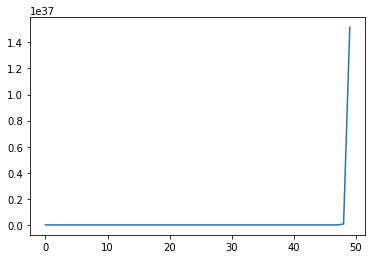

In [91]:
plt.plot(output)
plt.show();

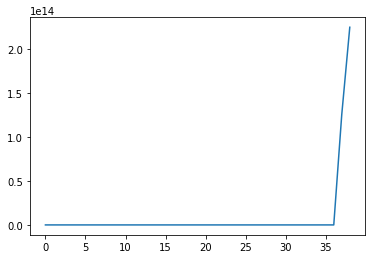

In [92]:
plt.plot(output[0:39])
plt.show();

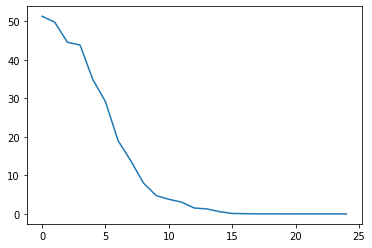

In [93]:
plt.plot(output[0:25])
plt.show();

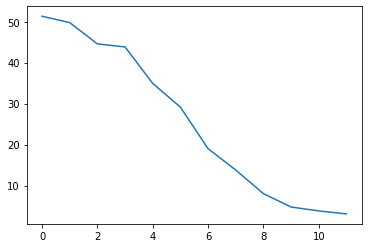

In [94]:
plt.plot(output[0:12])
plt.show();

# Попробую оформить всё в виде полноценного класса

In [13]:
from sklearn.base import BaseEstimator
from sklearn.base import RegressorMixin
import math
from sklearn.metrics import mean_squared_error

In [14]:
class Tri_PLS1_first(BaseEstimator, RegressorMixin):
    def  __init__(self, n_components=2, *, max_iter=500, tol=1e-06, copy=True):
        self.n_components = n_components
        self.max_iter = max_iter # Пока в ней нет необходимости. Прописал для общего фона.
        self.tol = tol
        self.copy = copy
        
    
    def fit(self, x, y):
        """Fits the model to the data (X, y)

        Parameters
        ----------
        X : ndarray, which was centering before running this code
            tensor data of shape (n_samples, N1, ..., NS)
        y : 1D-array of shape (n_samples, )
            labels associated with each sample"""
        Tt=np.zeros([x.shape[0],self.n_components])
        output=np.zeros([self.n_components])
        mass=np.zeros([y.shape[0]])
        y_copy=y
        """"
        При различных способах разрезания исходных данных, массивы w_k и w_i имеют похожие значения и именно их я планирую 
        использовать для функции predict данного класса. """
        w_k_mass=np.zeros([self.n_components,x.shape[1],1])
        w_i_mass=np.zeros([self.n_components,x.shape[2],1])
        bf_array=[]
        for f in range(0,self.n_components):
            z=np.zeros([x.shape[1],x.shape[2]])
            x_product=np.zeros([x.shape[0],x.shape[1],x.shape[2]])
            for i in range(0,x.shape[0]):
                x_product[i,:,:]=x[i,:,:]*y[i]
            z=x_product.sum(axis=0)
            Wk, S, WI = np.linalg.svd(z)
            w_k=np.array(Wk[0,:]).reshape(x.shape[1],1)
            w_i=np.array(WI[0,:]).reshape(x.shape[2],1)
            w_k_mass[f,:,:]=w_k
            w_i_mass[f,:,:]=w_i
            t=np.zeros([x.shape[0]])
            for h in range(0,x.shape[0]):
                t[h]=np.dot(np.dot(w_k.transpose(),x[h,:,:]),w_i)
            t=np.array(t).reshape(x.shape[0])
            Tt[:,f]=t
            T=np.array(Tt[:,0:f+1]).reshape(x.shape[0],f+1)
            bf=np.dot(np.dot(np.linalg.inv(np.dot(T.transpose(),T)),T.transpose()),y)
            bf_array+=[bf]
            mmas=np.kron(t,np.kron(w_i,w_k).reshape(x.shape[1],x.shape[2])).reshape(x.shape[0],x.shape[1],x.shape[2])
            x=x-(mmas)             
            y=y-(np.dot(T,bf))
            mass+=np.dot(T,bf)   
            output[f]=mean_squared_error(mass,y_copy)
        # Оставил только, что бы контролировать воспроизводимость и адекватность. 
        plt.plot(output)
        plt.show();
        self.bf_array=bf_array
        self.train_error=output
        self.w_k=w_k_mass
        self.w_i=w_i_mass
        return self
    
    def predict(self, x, y_test):
        """" x is a test 3-D centering data."""
        Tt=np.zeros([x.shape[0],self.n_components])
        output=np.zeros([self.n_components])
        for f in range(0,self.n_components):
            w_k=np.array(self.w_k[f,:,:]).reshape(x.shape[1],1)
            w_i=np.array(self.w_i[f,:,:]).reshape(x.shape[2],1)
            t=np.zeros([x.shape[0]])
            for h in range(0,x.shape[0]):
                t[h]=np.dot(np.dot(w_k.transpose(),x[h,:,:]),w_i)
            t=np.array(t).reshape(x.shape[0])
            Tt[:,f]=t
            T=np.array(Tt[:,0:f+1]).reshape(x.shape[0],f+1)
            mmas=np.kron(t,np.kron(w_i,w_k).reshape(x.shape[1],x.shape[2])).reshape(x.shape[0],x.shape[1],x.shape[2])
            x=x-(mmas) 
            
        """" В функции fit мы двигались от исходных у к 0, а здесь нужно идти наоборот. И для этого нужен коэффициент bf"""
        y_find=np.zeros([x.shape[0],self.n_components])
        for d in range(0,self.n_components):
            y=np.random.normal(0, math.sqrt(self.train_error[d]), x.shape[0])
            for f in range(0,d+1):
                size_T=d+1-f
                T_part=T[:,0:size_T]
                bf_1=np.dot(np.dot(np.linalg.inv(np.dot(T_part.transpose(),T_part)),T_part.transpose()),y)
                bf=self.bf_array[size_T-1]
                y=y+(np.dot(T_part,bf))
            y_find[:,d]=y
            if (((d-6)<0.9) and ((d-6)>(-0.9))):
                print(y)
                print(y_test)
            output[d]=mean_squared_error(y,y_test)
        plt.plot(output)
        plt.show();
        self.test_error=output
        self.y_find=y_find
        return self

In [18]:
a=Tri_PLS1_first(17)

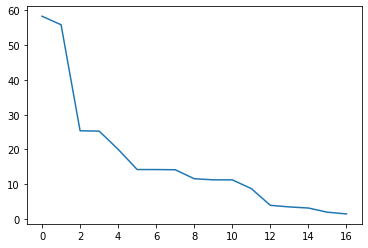

In [19]:
for i in range(0,1):
    a.fit(X_train,y_train)

[ -0.70868067   0.49183326  -1.24682712   1.16687656 -10.16707979
 -11.49365965  13.93154372   9.07516992  -9.97118696  -1.93879879]
[  7.58267641  16.05197918   4.55217322  -0.15706949  -3.08549775
  -8.58399134   4.05467602   2.44997086 -13.79718301   2.1530446 ]


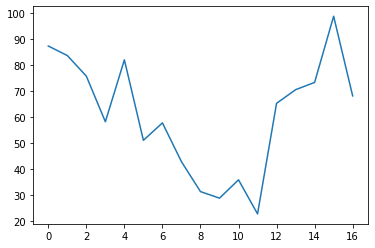

In [20]:
for i in range(0,1):
    a.predict(X_test,y_test)

In [21]:
y_test9=y_test+asas
y_test99=a.y_find[:,6]+asas

In [22]:
mean_squared_error(y_test9,y_test99)

57.768816157527624

In [23]:
y_test

array([  7.58267641,  16.05197918,   4.55217322,  -0.15706949,
        -3.08549775,  -8.58399134,   4.05467602,   2.44997086,
       -13.79718301,   2.1530446 ])

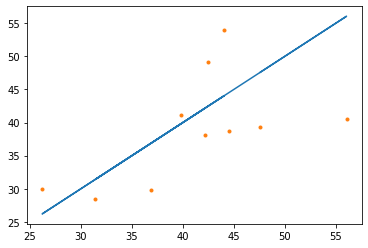

In [24]:
plt.plot(y_test9,y_test9)
plt.plot(y_test9,y_test99,".")
plt.show()

### Дальше идут черновеки, и прочие нефункциональные или тренеровочные элементы.

In [84]:
a

N_PLS1_first(copy=True, max_iter=500, n_components=27, norm_y_weights=False,
             scale=True, tol=1e-06)

In [ ]:
.reshape(x.shape[0],1)
-np.array(mass).reshape(1,x.shape[0]).mean()

In [179]:
y

array([34.19308759, 35.72443085, 46.32211944, 35.69579348, 47.44184036,
       33.34204937, 42.44462856, 39.9018207 , 44.39973652, 54.64066407,
       53.71596802, 44.04933373, 36.11255278, 34.24246421, 36.22622795,
       26.1974747 , 41.0398005 , 31.41066637, 34.07047331, 42.14770231,
       45.44679116, 21.41118209, 44.54683093, 35.35460545, 36.47993911])

In [395]:
output=np.zeros([parameters['numbers_of_components']])
for v in range(0,parameters['numbers_of_learning']):
    X_train, X_test, y_train, y_test = train_test_split(
        Xdata_numpy["X"], Ydata.iloc[:,parameters['column_y']], test_size=parameters['testSize'] 
        )
    x=X_train
    y=y_train
    y=np.array(y)
    x=np.array(x)
    Tt=[]
    mass=np.zeros([y.shape[0]])
    for f in range(0,parameters['numbers_of_components']):
        z=np.zeros([x.shape[1],x.shape[2]])
        for i in range(0,x.shape[2]):
            for j in range(0,x.shape[1]):
                zsum=0
                for k in range(0,x.shape[0]):
                    zsum= zsum+ x[k,j,i]*y[k]
                z[j,i]=zsum
        Wk, S, WI = np.linalg.svd(z)
        w_k=np.array(Wk[0,:]).reshape(x.shape[1],1)
        w_i=np.array(WI[0,:]).reshape(x.shape[2],1)
        t=[]
        for h in range(0,x.shape[0]):
            t+=[np.dot(np.dot(w_k.transpose(),x[h,:,:]),w_i)]
        t=np.array(t).reshape(x.shape[0],1)
        Tt+=[t]
        T=np.array(Tt).reshape(x.shape[0],f+1)
        bf=np.dot(np.dot(np.linalg.inv(np.dot(T.transpose(),T)),T.transpose()),y)
        mmas=np.kron(np.kron(w_i,w_k).reshape(x.shape[1],x.shape[2])
        
        for g in range(0,x.shape[0]):
            x[g,:,:]=x[g,:,:]-(t[g]*w_i.transpose()*w_k)
        y=y-(np.dot(T,bf))
        mass+=np.dot(T,bf)   
        output[f]+=error(mass,y_train)
np.array(output).reshape(1,parameters['numbers_of_components'])

array([[5.20396143e+04, 4.91918971e+04, 4.38839916e+04, 3.88590076e+04,
        3.28461510e+04, 2.71640444e+04, 2.06742360e+04, 1.51864921e+04,
        1.08940127e+04, 7.45914196e+03, 5.10460116e+03, 3.13773457e+03,
        1.85325287e+03, 8.68438137e+02, 4.09180232e+02, 2.46334649e+02,
        1.76439608e+02, 1.32129844e+02, 1.09666897e+02, 8.20938712e+01,
        4.59856659e+01, 2.60763430e+01, 1.10681096e+01, 4.58247849e+00,
        9.94812128e-01, 1.09443246e-07, 1.55442375e-08, 1.07111515e-08,
        4.36357780e-09, 8.25991184e-09, 8.28521838e-09, 3.91514087e-08,
        4.05800265e-07, 9.57270667e-08, 3.17840084e-06, 2.82484373e-06,
        6.49010797e-07, 2.30233617e-04, 7.71299123e-03, 1.62744298e-01,
        6.11296107e+01, 1.03835530e+03, 1.01042473e+03, 4.74122861e+03,
        6.23619775e+04, 9.49571644e+04, 1.22425553e+06, 5.50510253e+06,
        5.15620269e+06, 4.28673709e+06, 1.03028491e+09, 1.22720823e+12,
        9.71049882e+14, 6.76286674e+15, 4.44894505e+18]])

In [75]:
pp=np.array([[[1,2],[3,4]],[[5,6],[7,8]]])

In [76]:
pp

array([[[1, 2],
        [3, 4]],

       [[5, 6],
        [7, 8]]])

In [77]:
yu=np.array([1,2])

In [100]:
print(type(pp))

<class 'numpy.ndarray'>


In [78]:
np.dot(pp[1,:,:],yu[1])

array([[10, 12],
       [14, 16]])

In [79]:
pp.sum(axis=0)

array([[ 6,  8],
       [10, 12]])

In [125]:
vv=np.kron(np.array([7,6]),pp)

In [126]:
vv

array([[[ 7, 14,  6, 12],
        [21, 28, 18, 24]],

       [[35, 42, 30, 36],
        [49, 56, 42, 48]]])

In [130]:
vv[0,0,0:1]

array([7])

In [219]:
j=np.array([1,2,3])
jj=np.array([4,5,6])
jjj=np.array([7,8,9])

In [195]:
np.dot(ggg,j)

array([[32],
       [64],
       [96]])

In [191]:
j*jj

array([ 4, 10, 18])

In [192]:
j*ggg

array([[ 4, 10, 18],
       [ 8, 20, 36],
       [12, 30, 54]])

In [172]:
gg=j*jj.transpose()

In [178]:
gg

array([ 4, 10, 18])

In [181]:
ggg=np.kron(j,jj.transpose()).reshape(3,3)

In [184]:
ggg

array([[ 4,  5,  6],
       [ 8, 10, 12],
       [12, 15, 18]])

In [252]:
ggg*2

array([[ 8, 10, 12],
       [16, 20, 24],
       [24, 30, 36]])

In [183]:
np.kron(jjj,ggg).reshape(3,3,3)

array([[[ 28,  35,  42],
        [ 32,  40,  48],
        [ 36,  45,  54]],

       [[ 56,  70,  84],
        [ 64,  80,  96],
        [ 72,  90, 108]],

       [[ 84, 105, 126],
        [ 96, 120, 144],
        [108, 135, 162]]])

In [218]:
fff=np.kron(jjj,ggg).reshape(3,3,3)

In [225]:
np.dot(fff[0,:,:],j[1])

array([[ 56,  70,  84],
       [ 64,  80,  96],
       [ 72,  90, 108]])

In [ ]:
# пока в планах
class N_PLS1():
    def error(a,b):
        s=0
        for i in range(0,len(a)):
            s+=((a[i]-b.iloc[i]))**2
        return s
    def function_1(x,y,fn):
        Tt=[]
        mass=np.zeros([y.shape[0]])
        output=[]
        for f in range(0,fn):
            z=np.zeros([x.shape[1],x.shape[2]])
            for i in range(0,x.shape[2]):
                for j in range(0,x.shape[1]):
                    zsum=0
                    for k in range(0,x.shape[0]):
                        zsum= zsum+ x[k,j,i]*y[k]
                    z[j,i]=zsum
            Wk, S, WI = np.linalg.svd(z)
            w_k=np.array(Wk[0,:]).reshape(x.shape[1],1)
            w_i=np.array(WI[0,:]).reshape(x.shape[2],1)
            t=[]
            for h in range(0,x.shape[0]):
                t+=[np.dot(np.dot(w_k.transpose(),x[h,:,:]),w_i)]
            t=np.array(t).reshape(x.shape[0],1)
            Tt+=[t]
            T=np.array(Tt).reshape(x.shape[0],f+1)
            bf=np.dot(np.dot(np.linalg.inv(np.dot(T.transpose(),T)),T.transpose()),y)
            for g in range(0,x.shape[0]):
                x[g,:,:]=x[g,:,:]-(t[g]*w_i.transpose()*w_k)
            y=y-(np.dot(T,bf))
            mass+=np.dot(T,bf)
            output+=[error(mass,y_train)]
        return output
    def fit(x,y,fn):
        
            
        return y